<a href="https://colab.research.google.com/github/Theerachod/Image-classification-model/blob/main/Image_Classification_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prepare data for the image classification model

In [1]:
# Imitate image data from github
!git clone https://github.com/Theerachod/Image-classification-data
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import imghdr
import requests
import io
from PIL import Image
import numpy as np

Cloning into 'Image-classification-data'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 114 (delta 0), reused 58 (delta 0), pack-reused 54
Receiving objects: 100% (114/114), 115.88 MiB | 27.59 MiB/s, done.
Updating files: 100% (101/101), done.


In [2]:
# Set the path to image data
image_dir = "/content/Image-classification-data"
#Set type of image used to train model
image_ext = ["jpeg"]

In [3]:
# Check file in the folder from github
os.listdir(image_dir)

['Sad people image', '.git', 'Happy people image', 'README.md']

In [4]:
# Remover README.md file
%cd /content/Image-classification-data
!rm README.md
# Check if README.md has been removed or not
os.listdir(image_dir)

/content/Image-classification-data


['Sad people image', '.git', 'Happy people image']

In [5]:
os.listdir(image_dir)

['Sad people image', '.git', 'Happy people image']

In [6]:
# Check list of the file in Happy people image
os.listdir(os.path.join(image_dir,"Happy people image"))

['pexels-andrea-piacquadio-789822.jpg',
 'pexels-gabriela-cheloni-2124886.jpg',
 'pexels-vinicius-wiesehofer-1090387.jpg',
 'pexels-andrea-piacquadio-3758112.jpg',
 'pexels-anna-shvets-3727691.jpg',
 'pexels-andrea-piacquadio-863974.jpg',
 'pexels-godisable-jacob-932400.jpg',
 'pexels-rakicevic-nenad-769525.jpg',
 'pexels-godisable-jacob-944762.jpg',
 'pexels-fauxels-3182812.jpg',
 'pexels-ogo-johnson-2788815.jpg',
 'pexels-lola-russian-2205647.jpg',
 'pexels-nappy-936120.jpg',
 'pexels-andrea-piacquadio-819105.jpg',
 'pexels-luizclas-1848565.jpg',
 'pexels-pixabay-206362.jpg',
 'pexels-andrea-piacquadio-774909.jpg',
 'pexels-tirachard-kumtanom-1001850.jpg',
 'pexels-luna-lovegood-1104007.jpg',
 'pexels-moose-photos-1587009.jpg',
 'pexels-anna-shvets-4611670.jpg',
 'pexels-rdne-stock-project-6116042.jpg',
 'pexels-padli-pradana-2912166.jpg',
 'pexels-vlad-chețan-2923156.jpg',
 'pexels-italo-melo-2379004.jpg',
 'pexels-hannah-nelson-1456951.jpg',
 'pexels-lina-kivaka-1529621.jpg',
 'pex

In [7]:
# Check if there are any image types other than JPEG.
for image_class in os.listdir(image_dir):
    if image_class != ".git":
        for image in os.listdir(os.path.join(image_dir, image_class)):
            image_path = os.path.join(image_dir, image_class, image)
            try:
                #img = cv2.imread(image_path)
                img_type = imghdr.what(image_path)
                if img_type not in image_ext:
                    print(f"This {image_path} is not JPEG formatted.")
                    os.remove(image_path)
                else:
                    pass
            except Exception as e:
                print(f"There is some issue with {image_path} image")
    else:
        pass

In [8]:
# Split data into 10 batch
batch_size = 10
# Load data after removing images that are not jpeg
data = tf.keras.utils.image_dataset_from_directory(image_dir, batch_size=batch_size)
data_iterator = data.as_numpy_iterator()
# First batch
batch = data_iterator.next()

Found 100 files belonging to 2 classes.


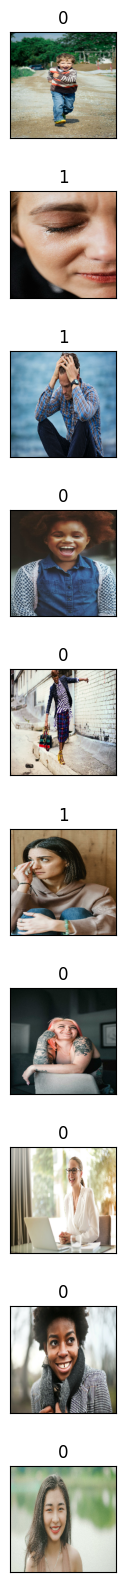

In [9]:
# See the label by tf.keras.utils.image_dataset_from_directory
# Class 0 > Happy people
# Class 1 > Sad people
fig, ax = plt.subplots(nrows = 10, figsize=(20,20))
for idx, img in enumerate(batch[0]):
    ax[idx].imshow(img.astype(int))
    ax[idx].set_xticks([])
    ax[idx].set_yticks([])
    ax[idx].title.set_text(batch[1][idx])

plt.subplots_adjust(hspace=0.5)
plt.show()

#Preprocess data for image classification model

In [10]:
# Check shape, min, and max value of the image resolution
images, labels = batch
print("Shape of the data:", images.shape)
print("Minimum value of the dimension:", images.min())
print("Maximum value of the dimension:", images.max())

Shape of the data: (10, 256, 256, 3)
Minimum value of the dimension: 0.0
Maximum value of the dimension: 255.0


In [11]:
# Scale the resolution value from 0 to 255 to 0 to 1
scaled_data = data.map(lambda x, y: (x/255, y))
scaled_data_iterator = scaled_data.as_numpy_iterator()
scaled_batch = scaled_data_iterator.next()

In [12]:
# Check shape, min, and max value of the image resolution after scaling
images, labels = scaled_batch
print("Shape of the data:", images.shape)
print("Minimum value of the dimension:", images.min())
print("Maximum value of the dimension:", images.max())

Shape of the data: (10, 256, 256, 3)
Minimum value of the dimension: 0.0
Maximum value of the dimension: 1.0


In [13]:
# Check batches of images
data_batch = len(scaled_data)
print(data_batch)

10


In [14]:
# Split data into train, validation, and test set
train_size = int(data_batch*0.7)
val_size = int(data_batch*0.2)
test_size = int(data_batch*0.1)
print("number of batches to train: ",train_size, " batches")
print("number of batches to validate: ",val_size, " batches")
print("number of batches to test: ",test_size, " batches")

number of batches to train:  7  batches
number of batches to validate:  2  batches
number of batches to test:  1  batches


In [15]:
# Specify data for training, validation, and testing
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

#Build deep learning model (training)

In [17]:
# Import functions to build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [18]:
# Intiate the model
model = Sequential()

# Add layer to the deep learning mode
# First layer
model.add(Conv2D(16, (3, 3), 1, activation = "relu", input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

# Second layer
model.add(Conv2D(32, (3, 3), 1, activation = "relu"))
model.add(MaxPooling2D())
# Third layer
model.add(Conv2D(16, (3, 3), 1, activation = "relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

# Compile the model
model.compile(optimizer = "adam", loss = tf.losses.BinaryCrossentropy(), metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [19]:
# Create folder called logs
if not os.path.exists("/content/logs"):
    os.makedirs("/content/logs")

In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="/content/logs")

In [21]:
# fit the data to the model
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 43s 4s/step - loss: 0.9400 - accuracy: 0.4571 - val_loss: 0.6791 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 40s 4s/step - loss: 0.6816 - accuracy: 0.5143 - val_loss: 0.6611 - val_accuracy: 0.7000
Epoch 3/20
7/7 [==============================] - 40s 4s/step - loss: 0.6587 - accuracy: 0.6429 - val_loss: 0.6341 - val_accuracy: 0.7500
Epoch 4/20
7/7 [==============================] - 42s 4s/step - loss: 0.5798 - accuracy: 0.7857 - val_loss: 0.8015 - val_accuracy: 0.4500
Epoch 5/20
7/7 [==============================] - 41s 4s/step - loss: 0.5712 - accuracy: 0.6714 - val_loss: 0.5157 - val_accuracy: 0.7000
Epoch 6/20
7/7 [==============================] - 42s 4s/step - loss: 0.5238 - accuracy: 0.7143 - val_loss: 0.3330 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 42s 4s/step - loss: 0.3352 - accuracy: 0.9000 - val_loss: 0.2945 - val_accuracy: 0.9000
Epoch 8/20
7/7 [==================

In [22]:
# Call the information about training model
hist.history

{'loss': [0.9400131106376648,
  0.6815599203109741,
  0.658653199672699,
  0.5798265933990479,
  0.5711965560913086,
  0.5238186717033386,
  0.33518174290657043,
  0.26210111379623413,
  0.15131258964538574,
  0.09007028490304947,
  0.04642219468951225,
  0.03231075406074524,
  0.019564395770430565,
  0.007224096450954676,
  0.0024123545736074448,
  0.0023132599890232086,
  0.0011619856813922524,
  0.0012800615513697267,
  0.0005679609603248537,
  0.0005903278361074626],
 'accuracy': [0.4571428596973419,
  0.5142857432365417,
  0.6428571343421936,
  0.7857142686843872,
  0.6714285612106323,
  0.7142857313156128,
  0.8999999761581421,
  0.9428571462631226,
  0.9857142567634583,
  0.9714285731315613,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6790910959243774,
  0.6611101031303406,
  0.634091854095459,
  0.8015069961547852,
  0.5156615972518921,
  0.3329705595970154,
  0.29445523023605347,
  0.17641615867614746,
  0.05682126432657242,
  0.03898

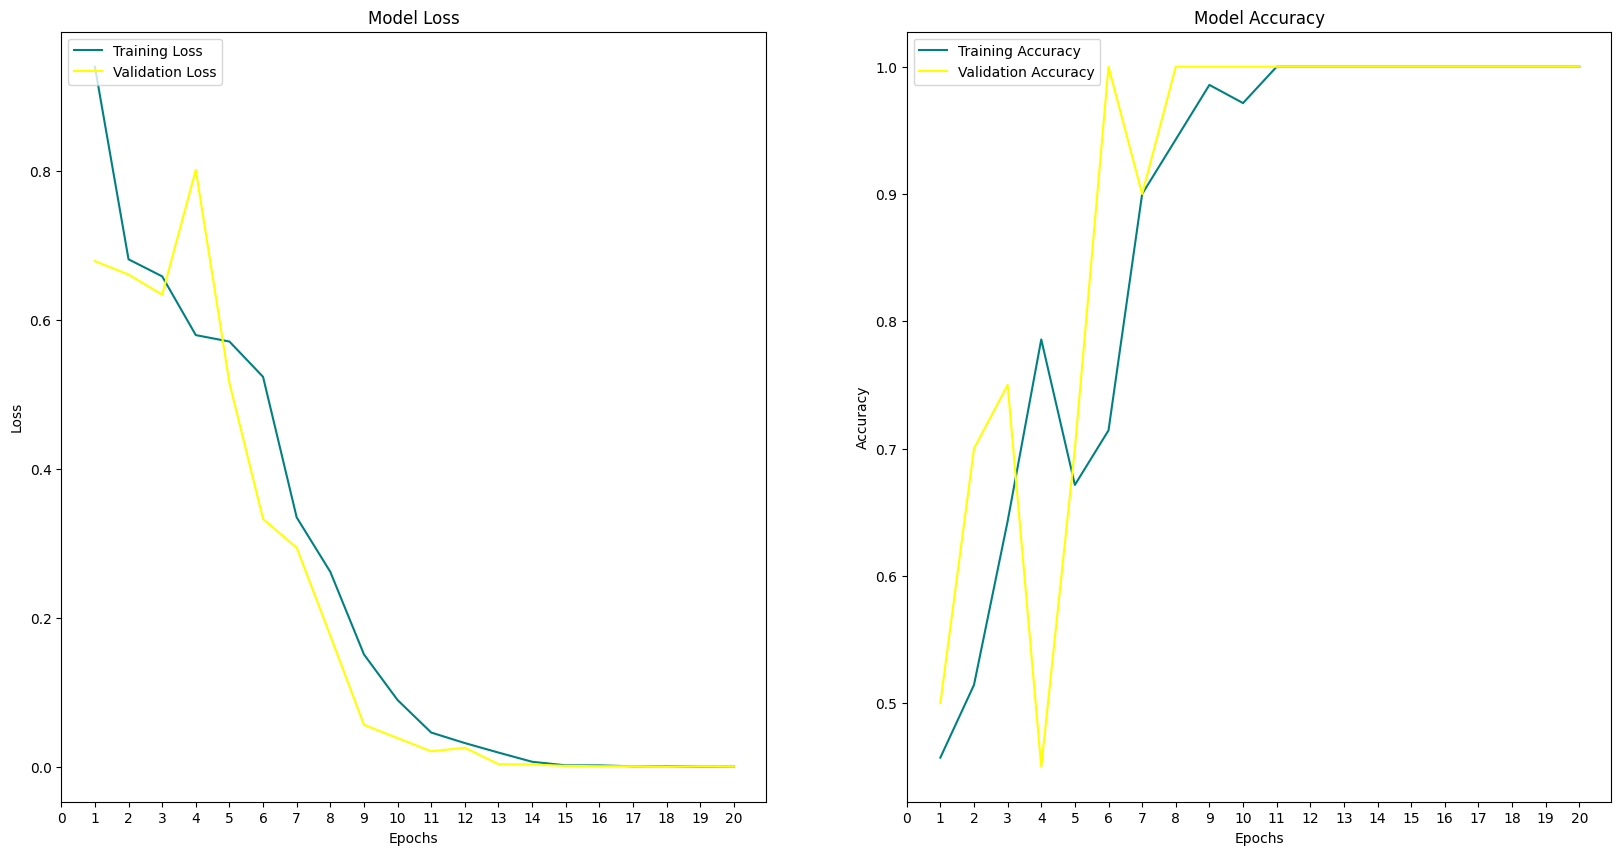

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plotting loss
loss = axes[0]
loss.plot(range(1, 21), hist.history['loss'], color="teal", label="Training Loss")
loss.plot(range(1, 21), hist.history['val_loss'], color="yellow", label="Validation Loss")
loss.set_title('Model Loss')
loss.set_xlabel('Epochs')
loss.set_ylabel('Loss')
loss.legend(loc='upper left')
loss.set_xticks(range(21))

# Plotting accuracy
accuracy = axes[1]
accuracy.plot(range(1, 21), hist.history['accuracy'], color="teal", label="Training Accuracy")
accuracy.plot(range(1, 21), hist.history['val_accuracy'], color="yellow", label="Validation Accuracy")
accuracy.set_title('Model Accuracy')
accuracy.set_xlabel('Epochs')
accuracy.set_ylabel('Accuracy')
accuracy.legend(loc='upper left')
accuracy.set_xticks(range(21))

# Show the plot
plt.show()


#Evaluate model performance (testing)

In [24]:
# Import functions to evaluate the model
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [25]:
# Intialize
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [26]:
for batch in test.as_numpy_iterator():
    img, label = batch
    predicted_label = model.predict(img)
    precision.update_state(label, predicted_label)
    recall.update_state(label, predicted_label)
    accuracy.update_state(label, predicted_label)

print(f"Precision: {precision.result()}")
print(f"Recall: {recall.result()}")
print(f"Accuracy: {accuracy.result()}")

1/1 [==============================] - 0s 298ms/step
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


In [28]:
# Create function to download image from image url
# Import necessary libraries
import requests
from PIL import Image
import io

def get_image_url(url):
    r = requests.get(url)
    content = r.content
    image = Image.open(io.BytesIO(content))
    return image

In [33]:
# Image url
happy_url = "https://github.com/Sepdham/Test-Image/blob/main/pexels-luizclas-1848565.jpg?raw=true"
sad_url = "https://github.com/Sepdham/Test-Image/blob/main/pexels-william-fortunato-6392811.jpg?raw=true"

# Download image from pre-defined function
happy_image = get_image_url(happy_url)
happy_image.save("/content/happy_image.jpg", format = "JPEG")
sad_image = get_image_url(sad_url)
sad_image.save("/content/sad_image.jpg", format = "JPEG")

In [34]:
# Create folder to store image
folder_path = "/content/new_data/test_image"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Move the downloaded images to the folder
os.rename("/content/happy_image.jpg", os.path.join(folder_path, "happy_image.jpg"))
os.rename("/content/sad_image.jpg", os.path.join(folder_path, "sad_image.jpg"))

In [93]:
# Create data from folder
new_test_image_data = tf.keras.utils.image_dataset_from_directory("/content/new_data")
# Scale the resolution value from 0 to 255 to 0 to 1
scaled_new_test_image_data = new_test_image_data.map(lambda x, y: (x/255, y))
# Create new test data
new_test = scaled_new_test_image_data.take(len(scaled_new_test_image_data))
new_test_iterator = new_test.as_numpy_iterator()
new_test_iterator_batch = new_test_iterator.next()

Found 2 files belonging to 1 classes.


In [94]:
# Make a prediction
for batch in new_test_iterator:
    img, label = batch
    predicted_label = model.predict(img)

# Print the result
print(predicted_label)

[[0.9194267 ]
 [0.00225735]]


In [95]:
# set the threshold
threshold = 0.5

# Transfrom the result to either 0 or 1
results = np.array(predicted_label)

# set the threshold
threshold = 0.5
results = np.where(results > threshold, 1, 0)

# Print the result
print(results)

[[1]
 [0]]


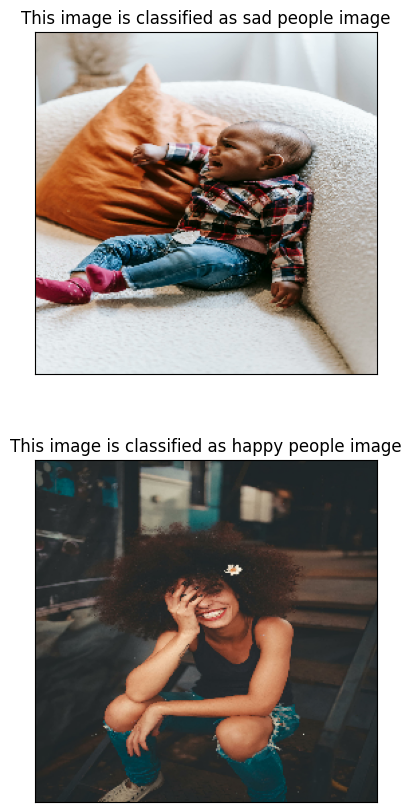

In [97]:
# Scaled back to 256 dimension
scaled_back = new_test_iterator_batch[0] * 255

# Make visualization
fig, ax = plt.subplots(nrows = 2, figsize=(20,10))
for idx, img in enumerate(scaled_back):
    ax[idx].imshow(img.astype(int))
    ax[idx].set_xticks([])
    ax[idx].set_yticks([])
    for idx, result in enumerate(results):
        if results[idx][0] == 0:
            title = "This image is classified as happy people image"
        else:
            title = "This image is classified as sad people image"
        ax[idx].title.set_text(title)

plt.subplots_adjust(hspace=0.25)
plt.show()

#Save the model for future usage

In [101]:
# Import function to load saved model
from tensorflow.keras.models import load_model

In [102]:
# Create folder to store the model
model_path = "/content/model"
if not os.path.exists(model_path):
    os.makedirs(model_path)

# Save model
model.save(os.path.join(model_path,"happy_sad_people_model.h5"))

In [103]:
# Load model
model = load_model(os.path.join(model_path,"happy_sad_people_model.h5"))
print(model)